# Обработка данных с парсинга, начальное EDA тренировочного набора 

In [1]:
#Загружаем необходимые библиотеки
import csv
import pandas as pd
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


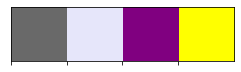

In [2]:
#Нашла в ютубе интересную фишку присваивать цветовую гамму 
#проекту и делать графики согласно цветовой гамме, решила ее использовать здесь
colors = ['#696969','#E6E6FA','#800080','#FFFF00']
sns.palplot(sns.color_palette(colors))

## 1. Первичная обработка загруженного датасета

In [3]:
df=pd.read_csv('all.csv',engine='python', header=1)

In [4]:
df.head(2)

,0,Unnamed: 1,name,price,params,params2,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,0.0,['BMW 3 серии 320d xDrive VI (F3x) Рестайлинг'],['1795000'],"['год выпуска', '2016', 'Пробег', '87000', 'Ку...","['Отличное техническое состояние', 'Кожаный са...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,['Toyota ISis I Рестайлинг'],['870000'],"['год выпуска', '2011', 'Пробег', '136400', 'К...",['Аукционный авто с родным пробегом. ОТС. Я ед...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

0                  0
Unnamed: 1        39
name               0
price              0
params             0
params2         2529
Unnamed: 6     50976
Unnamed: 7     50976
Unnamed: 8     50976
Unnamed: 9     50976
Unnamed: 10    50976
Unnamed: 11    50976
Unnamed: 12    50976
Unnamed: 13    50976
Unnamed: 14    50976
Unnamed: 15    50976
Unnamed: 16    50976
Unnamed: 17    50976
Unnamed: 18    50976
Unnamed: 19    51021
dtype: int64

*Сразу удалю колонки с очевидными пропусками*

In [6]:
df=df.drop(columns=[ 'Unnamed: 1', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'], axis=True)

*Удалю дубликаты, так как парсила все  по частям, и вероятность дубликатов велика*

In [7]:
df = df.drop_duplicates(['name', 'price', 'params', 'params2'], keep='last')

*Разделю столбец "params", там лежат все нужные нам признаки*

In [8]:
df1= df['params'].str.split(',',expand=True)
df=df.join(df1, how='left',sort=False)

In [9]:
df.head(2)

,0,name,price,params,params2,0,1,2,3,4,...,244,245,246,247,248,249,250,251,252,253
0,1,['BMW 3 серии 320d xDrive VI (F3x) Рестайлинг'],['1795000'],"['год выпуска', '2016', 'Пробег', '87000', 'Ку...","['Отличное техническое состояние', 'Кожаный са...",['год выпуска','2016','Пробег','87000','Кузов',...,None,None,None,None,None,None,None,None,None,None
1,2,['Toyota ISis I Рестайлинг'],['870000'],"['год выпуска', '2011', 'Пробег', '136400', 'К...",['Аукционный авто с родным пробегом. ОТС. Я ед...,['год выпуска','2011','Пробег','136400','Кузов',...,None,None,None,None,None,None,None,None,None,None


****Получилось большое количество столбцов, выберу адекватные*, на мой взгляд, и добавлю в новый датафрейм****
*под адекватными я имела в виду те, которые несут хоть какую-либо информацию кроме None

In [10]:
data=pd.DataFrame
data=df[['name','price',1,3,5,7,9,10,12,14,16,18,20,22,24,26,28,'params2']]

## 2. Работа с новый датафреймом. Обработка признаков

*Для начала уберу квадратные скобки и кавычки и переименую названия столбцов в понятные*

In [11]:
for i, col in enumerate(data.columns):
    data.iloc[:, i] = data.iloc[:, i].apply(str).str.replace(']', '').str.replace('[','')#.replace(" ' \'", " ")
for i, col in enumerate(data.columns):
    data.iloc[:, i] = data.iloc[:, i].apply(str).str.replace('\'', '')#.replace("''", " ").replace(" ' \'", " ")

In [12]:
data.rename(columns={#'params2': 'comment', #комментарий продавца 
                     1: 'year',  #год
                     3: 'mileage', #пробег
                     5: 'type', #тип кузова
                     7: 'color', #цвет
                    9: 'engAndPower', #цвет
                     10:'engine', #вид топлива
                     12:'tax', #налог
                     14:'transmission', #коробка передач
                     16:'drive_unit',# привод
                    18:'wheel', #положение руля
                     20:'v_condition', #состояние
                    22:'owners', #кол-во владельцев
                     24:'passport', #наличие тех.паспорта
                     26:'customs_clearance', #растаможен или нет
                     27:'exchange' ,#обмен или нет
               
                    
                    
                    }, inplace=True)

In [ ]:
#df.loc[pd.isnull(df).any(1), :].index.values

In [ ]:
#pd.options.display.max_colwidth =1000

### 2.1. Анализ пропусков

In [ ]:
data.isnull().sum()

In [ ]:
data[data['name']=='']#.value_counts()

***Из-за того, что убрала кавычки и скобки мои пропуски "затерлись", нужно сделать так, чтобы они стали опять видны***

In [ ]:
data.replace(to_replace='None', value=np.nan, inplace=True)

In [ ]:
data.replace(to_replace='nan', value=np.nan, inplace=True)

In [ ]:
data.replace(to_replace='', value=np.nan, inplace=True)

In [ ]:
cols = data.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

**Удалю строки с пропусками, которых в строке встречается большинство**

In [ ]:
data = data.dropna(thresh=len(data.columns)//2+1)

In [ ]:
cols = data.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

In [ ]:
data.isnull().sum()

**Далее я буду заполнять пропуски, просматривая каждый признак**

### Марка автомобиля ###

Создаю столбец бренд автомобиля, то есть группирую, например все Nissan в бренд NISSAN

In [13]:
data['brand']=data['name'].apply(lambda x: 'VOLKSWAGEN' if 'Volks' in x
                              else ('BMW' if 'BMW' in x else
                                    ('MERCEDES' if 'Merce' in x else 
                                     ('TOYOTA' if 'Toyot' in x else 
                                     ('RENAULT' if 'Renau' in x else 
                                     ('FORD' if 'Ford' in x else 
                                     ('KIA' if 'Kia' in x else 
                                      ('NISSAN' if 'Nissan' in x else 
                                       ('SKODA' if 'Skoda' in x else 
                                        ('IRAN' if 'Iran' in x else 
                                         ('BMW' if 'MINI' in x else 
                                          ('TESLA' if 'Tesla' in x else 
                                            ('AUDI' if 'Audi' in x else 
                                             ('CITROEN' if 'Citroen' in x else
                                               ('PORSCHE' if 'Porsche' in x else 
                        ('LEXUS' if 'Lexus' in x else 
                          ('HYUNDAI' if 'Hyundai' in x else 
                            ('CHRYSLER' if 'Chrysler' in x else 
                              ('LAMBORGHINI' if 'Lamborghini' in x else 
                                ('HONDA' if 'Honda' in x else 
                                 ('MAZDA' if 'Mazda' in x else
                                  ('CADILLAC' if 'Cadillac' in x else
                                   ('JAGUAR' if 'Jaguar' in x else
                                    ('SUBARU' if 'Subaru' in x else
                                     ('MITSUBISHI' if 'Mitsubishi' in x else
                                      ('OPEL' if 'Opel' in x else
                                       ('DONGFENG' if 'DongFeng' in x else 
                                        ('SEAT' if 'SEAT' in x else
                                         ('ГАЗ' if 'ГАЗ' in x else
                                          ('HAIMA' if 'Haima' in x else
                                           ('INFINITI' if 'Infiniti' in x else
                                            ('CHEVROLET' if 'Chevrolet' in x else
                                             ('PEUGEOT' if 'Peuge' in x else
                                              ('VOLVO' if 'Volvo' in x else
                                               ('DODGE' if 'Dodge' in x else
                                                ('CHEVROLET' if 'Chevrolet' in x else
            ('LADA' if 'LADA' in x else
             ('GEELY' if 'Geely' in x else
              ('SSANGYONG' if 'SsangYong' in x else
               ('LAND ROVER' if 'Land Rover' in x else
                ('SMART' if 'Smart Forfour' in x else
                 ('SUZUKI' if 'Suzuki' in x else
                  ('HAVAL' if 'Haval' in x else
                 ('CHERY' if 'Chery' in x else
                  ('ЗАЗ' if 'ЗАЗ' in x else
                   ('ИЖ' if 'ИЖ' in x else
                    ('FIAT' if 'Fiat' in x else
                     ('LIFAN' if 'Lifan' in x else
                      ('ACURA' if 'Acura' in x else
                    ('BENTLEY' if 'Bentley' in x else
                   ('GENESIS' if 'Genesis' in x else
                     ('JEEP' if 'Jeep' in x else
                       ('ISUZU' if 'Isuzu' in x else
                        ('ROVER' if 'Rover' in x else
                         ('GWM' if 'Great Wall Wingle' in x else
                          ('ISUZU' if 'Isuzu' in x else
                           ('GWM' if 'Great Wall Wingle' in x else
                            ('BUICK REGAL' if 'Buick' in x else
                             ('CITROEN' if 'DS 3' in x else
                              ('BMW' if 'Alpina' in x else
                              ('FERRARI' if 'Ferrari' in x else
                                ('FERRARI' if 'Ferrari' in x else
                                  ('FERRARI' if 'Ferrari' in x else
                                    ('ROLLS-ROYCE' if 'Rolls-Royce' in x else
                                    ('RAVON' if 'Ravon' in x else 
                                      ('FAW' if 'FAW' in x else 
                                        ('DW' if 'DW' in x else 
                                         ('HAFEI' if 'Hafei' in x else
                                          ('VORTEX' if 'Vortex' in x else
                                           ('LINCOLN' if 'Lincoln' in x else 
                                            ('УАЗ' if 'УАЗ' in x else
                                             ('RAM' if 'RAM' in x else 
                                              ('ЗИС' if 'ЗиС' in x else
                                               ('JAC' if 'JAC' in x else
                                                ('MASERATI' if 'Maserati' in x else
                                                 ('CHANGAN' if 'Changan' in x else
               x))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))

In [14]:
data.brand.isnull().sum()

0

In [15]:
data.brand.value_counts()

BMW                              8833
VOLKSWAGEN                       7691
MERCEDES                         4517
TOYOTA                           1903
HYUNDAI                          1831
                                 ... 
Saab 9-5 I Рестайлинг               1
DW                                  1
Great Wall Deer  G5                 1
BUICK REGAL                         1
Alfa Romeo 156 I Рестайлинг 2       1
Name: brand, Length: 106, dtype: int64

*Пропусков здесь нет*

### Цена  (целевая переменная) ###

Данный признак является непросредственно таргетом, проанализирую на выбросы и на шум

In [16]:
data['price']=pd.to_numeric(data['price'], errors='coerce').fillna(0).astype(int)

In [17]:
data.price

0        1795000
1         870000
3        1635000
4         849000
5         188000
          ...   
61287          0
61288    2275000
61289    3090000
61290          0
61291     545000
Name: price, Length: 36362, dtype: int64

**Проанализирую выбросы в цене**

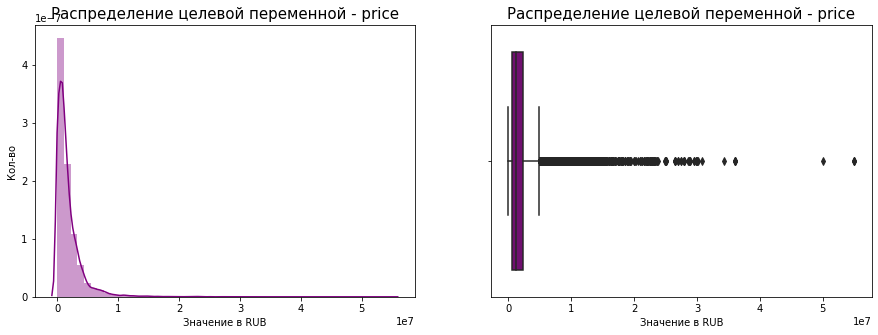

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(data.price.values, bins=50, color=colors[2])
plt.title('Распределение целевой переменной - price',fontsize=15)
plt.xlabel('Значение в RUB'); plt.ylabel('Кол-во');

plt.subplot(122)
sns.boxplot(data.price.values, color=colors[2])
plt.title('Распределение целевой переменной - price',fontsize=15)
plt.xlabel('Значение в RUB'); 

In [19]:
data.price.describe()

count    3.636200e+04
mean     1.787601e+06
std      2.417013e+06
min      0.000000e+00
25%      4.950000e+05
50%      1.139000e+06
75%      2.270000e+06
max      5.500000e+07
Name: price, dtype: float64

<blockquote>Решила удалить строки с нулевой ценой, так как их немного</blockquote> 

In [20]:
data=data.drop((data.loc[data['price']==0]).index)

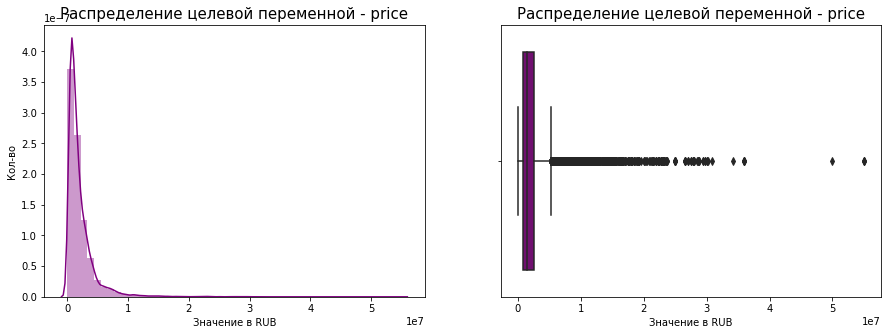

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(data.price.values, bins=50, color=colors[2])
plt.title('Распределение целевой переменной - price',fontsize=15)
plt.xlabel('Значение в RUB'); plt.ylabel('Кол-во');

plt.subplot(122)
sns.boxplot(data.price.values, color=colors[2])
plt.title('Распределение целевой переменной - price',fontsize=15)
plt.xlabel('Значение в RUB'); 

In [ ]:
#cols = data.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
#colours = ['#000099', '#ffff00'] 
#sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

Решила разбить по группа цены, мне так легче увидеть аномалии

In [24]:
data['price_group']=pd.qcut(data['price'],10)

In [25]:
data.groupby(['price_group'])['price'].agg('count')

price_group
(19999.999, 450000.0]      3146
(450000.0, 649000.0]       3105
(649000.0, 847000.0]       3063
(847000.0, 1099000.0]      3180
(1099000.0, 1375977.0]     3024
(1375977.0, 1725000.0]     3120
(1725000.0, 2225000.0]     3090
(2225000.0, 2987400.0]     3099
(2987400.0, 4250163.4]     3103
(4250163.4, 55000000.0]    3104
Name: price, dtype: int64

### Год выпуска

In [26]:
data.year.value_counts()

 2018                                        2635
 2017                                        2311
 2016                                        2121
 2019                                        2084
 2013                                        1976
                                             ... 
 птс оригинал. Пройдено т.о. На 21т.км.         1
 Автомобиль с полным НДС !                      1
 •       Хорошее техническое состояние          1
 есть всё что можно                             1
 Отличное внешнее и техническое состояние       1
Name: year, Length: 1990, dtype: int64

In [27]:
data['year']=pd.to_numeric(data['year'], errors='coerce').fillna(0).astype(int)

In [34]:
data.year.describe()

count    24756.000000
mean      2013.761755
std          5.624810
min       1948.000000
25%       2012.000000
50%       2015.000000
75%       2018.000000
max       2021.000000
Name: year, dtype: float64

**Сделаю отбор адекватных лет**

<AxesSubplot:>

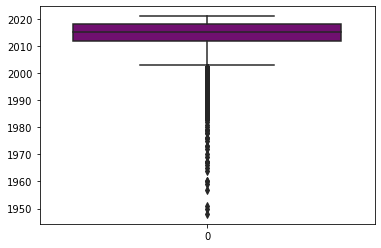

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['year'],color=colors[2])

In [29]:
data=data.drop((data.loc[data['year']<1945]).index)

In [30]:
data=data.drop((data.loc[data['year']>2021]).index)

Проверяю

In [36]:
data['year_group']=pd.qcut(data['year'],5)

In [37]:
data.groupby(['year_group'])['price_group'].agg('count')

year_group
(1947.999, 2011.0]    6147
(2011.0, 2013.0]      3916
(2013.0, 2016.0]      5627
(2016.0, 2018.0]      4946
(2018.0, 2021.0]      4120
Name: price_group, dtype: int64

### Расположение руля

In [38]:
data.wheel.value_counts()

 Левый                     22932
 передний                    608
 полный                      522
 Не требует ремонта          403
 Руль                        119
 Правый                      105
 задний                       47
 Привод                       10
 Состояние                     9
 VIN: XWEHM511AD0000192        1
Name: wheel, dtype: int64

*Проанализировав в таблице строки, где расположение руля не указано или заполнено некорректно, решила поставить на этих местах популярную категорию, т.е. расположение руля слева*

In [39]:
data['wheel']=data['wheel'].apply(lambda x: 'Левый' if 'Лев' in x
                             else ('Правый' if 'Прав' in x
                        else  'Левый' ))

In [40]:
data['wheel'].value_counts()

Левый     24651
Правый      105
Name: wheel, dtype: int64

### Вид топлива

In [41]:
data.engine.value_counts()

 Бензин                               18020
 Дизель                                6596
 Гибрид                                  80
 Запас хода                              48
 Налог                                    5
 Газ                                      5
 боковые зеркала с электроприводом        1
 Комплектация                             1
Name: engine, dtype: int64

*Заменю некорректные названия на 'no_info'*

In [42]:
data['engine']=data['engine'].apply(lambda x: 'Бензин' if 'Бен' in x
                             else ('Газ' if 'Газ' in x
                        else  ('Гибрид' if 'Гибрид' in x  else ('Дизель' if 'Дизель' in x else 'no_info'))))

### Состояние

In [43]:
data.v_condition.value_counts()

 Не требует ремонта               23037
 Левый                             1172
 1владелец                          167
 3 или более                        124
 Состояние                          119
 2владельца                         112
 Руль                                10
 Владельцы                            9
 Правый                               5
 а также в КРЕДИТ под низкий %        1
Name: v_condition, dtype: int64

In [44]:
data['v_condition']=data['v_condition'].apply(lambda x: 'Не требует ремонта' if 'Не требует ' in x
                             else  'no_info')

### ПТС

In [45]:
data.passport.value_counts()

 Оригинал              20671
 Дубликат               2366
 1владелец               544
 3 или более             342
 Растаможен              315
                       ...  
 11 лет                    1
 6 лет и 9 месяцев         1
 17 лет и 2 месяца         1
 10 лет и 1 месяц          1
 5 лет и 12 месяцев        1
Name: passport, Length: 74, dtype: int64

Заменю неизвестные данные на более популярную категорию

In [46]:
data['passport']=data['passport'].apply(lambda x: 'Оригинал' if 'Ориг' in x
                             else  'Дубликат' if 'Дубли' in x else 'Оригинал')

In [47]:
data.passport.value_counts()

Оригинал    22390
Дубликат     2366
Name: passport, dtype: int64

### Пробег


In [48]:
data['mileage']=pd.to_numeric(data['mileage'], errors='coerce').fillna(0).astype(int)

In [49]:
data=data.drop((data.loc[data['mileage']==0]).index)

In [53]:
data['mileage_group']=pd.qcut(data['mileage'],10)

In [54]:
data[data['mileage']==0]

,name,price,year,mileage,type,color,engAndPower,engine,tax,transmission,...,v_condition,owners,passport,customs_clearance,28,params2,brand,price_group,year_group,mileage_group


Решаю удалить автомобили с нулевым пробегом, так как 0 там стал автоматически при переводе в int64 после None

In [55]:
data.groupby(['mileage_group'])['mileage_group'].agg('count')

mileage_group
(0.999, 20400.0]         2478
(20400.0, 43796.0]       2473
(43796.0, 64000.0]       2507
(64000.0, 82653.4]       2444
(82653.4, 100492.0]      2477
(100492.0, 121799.6]     2474
(121799.6, 143319.4]     2475
(143319.4, 171025.0]     2476
(171025.0, 217592.0]     2475
(217592.0, 1000000.0]    2476
Name: mileage_group, dtype: int64

In [56]:
data.mileage.describe()

count      24755.000000
mean      114243.020198
std        82603.647895
min            1.000000
25%        53958.500000
50%       100492.000000
75%       156170.000000
max      1000000.000000
Name: mileage, dtype: float64

In [57]:
data[data['mileage']==1000000]

,name,price,year,mileage,type,color,engAndPower,engine,tax,transmission,...,v_condition,owners,passport,customs_clearance,28,params2,brand,price_group,year_group,mileage_group
60670,Volkswagen Passat B3,24930,1991,1000000,седан,синий,2.0 л / 115л.с. /,Бензин,2070₽ / год,механическая,...,Не требует ремонта,3 или более,Дубликат,10 лет и 2 месяца,Растаможен,"Автомобиль ФОЛЬКСВАГЕН ПАССАТ, 1991 года выпус...",VOLKSWAGEN,"(19999.999, 450000.0]","(1947.999, 2011.0]","(217592.0, 1000000.0]"


<AxesSubplot:>

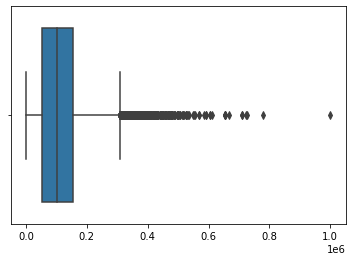

In [58]:
sns.boxplot(data.mileage.values)

### Тип кузова

In [59]:
data.type.value_counts()

 внедорожник 5 дв.          11006
 седан                       8209
 хэтчбек 5 дв.               1756
 лифтбек                      731
 универсал 5 дв.              704
 минивэн                      613
 купе                         556
 компактвэн                   290
 хэтчбек 3 дв.                278
 пикап двойная кабина         180
 внедорожник 3 дв.            145
 фургон                       104
 кабриолет                     78
 родстер                       46
 купе-хардтоп                  41
 седан 2 дв.                    4
 внедорожник открытый           3
 пикап одинарная кабина         3
 лимузин                        2
 хэтчбек 4 дв.                  2
 пикап полуторная кабина        2
 тарга                          1
 микровэн                       1
Name: type, dtype: int64

*Здесь все названия адекватные, иду дальше*

### Цвет автомобиля

In [60]:
data.color.value_counts()

 чёрный         7343
 белый          6053
 серый          3172
 синий          2424
 серебристый    2021
 коричневый     1315
 красный         908
 бежевый         489
 зелёный         333
 голубой         227
 оранжевый       120
 пурпурный       104
 жёлтый           88
 золотистый       84
 фиолетовый       72
 розовый           2
Name: color, dtype: int64

*Здесь все названия адекватные, иду дальше*

### Привод

In [61]:
data.drive_unit.value_counts()

 полный              11857
 передний             8596
 задний               2584
 автоматическая        573
 механическая          417
 Левый                 401
 Привод                119
 роботизированная       95
 вариатор               92
 Коробка                10
 Руль                    9
 Правый                  2
Name: drive_unit, dtype: int64

In [62]:
data['drive_unit']=data['drive_unit'].apply(lambda x: 'полный' if 'полны' in x
                             else  ('передний' if 'передни' in x 
                                    else ('задний' if 'задни' in x 
                                          else 'no_info')))

Решаю пропуски заполнить no_info

### Трансмиссия

In [63]:
data.transmission.value_counts()

 автоматическая      14846
 механическая         4446
 роботизированная     2903
 вариатор              842
 полный                222
                     ...  
 3270₽ / год             1
 263250₽ / год           1
 449₽ / год              1
 1008₽ / год             1
 1715₽ / год             1
Name: transmission, Length: 450, dtype: int64

In [64]:
data['transmission']=data['transmission'].apply(lambda x: 'автоматическая' if 'автом' in x
                             else  ('механическая' if 'механ' in x 
                                    else ('роботизированная' if 'робот' in x 
                                           else ('вариатор' if 'вариат' in x 
                                          else 'no_info'))))

### Налог

In [65]:
data.tax.value_counts()

 18675₽ / год    1501
 5250₽ / год     1215
 9200₽ / год      879
 9500₽ / год      623
 18375₽ / год     537
                 ... 
 476₽ / год         1
 3836₽ / год        1
 Business Jet       1
 EXECUTIVE          1
 1926₽ / год        1
Name: tax, Length: 1931, dtype: int64

*Удалю столбец с налогом, не решила что с ним можно придумать*

In [66]:
data=data.drop('tax', 1)

### Объем двигателя и кол-во лошадиных сил

Решила разделить колонку с объем двигателя и кол-во лошадиных сил по черте, получилось три столбца

In [67]:
data[['eng_volume','horsepower','empty']]=data['engAndPower'].str.split('/', expand=True)

In [68]:
data['empty'].value_counts()

            24701
 Электро       54
Name: empty, dtype: int64

В третьей колонке иногда появляется пометка "Электро", удалю, так как в лошидиные силы попадает кол-во кВт, пока не буду с этим разбираться и таких строчек только 53

In [69]:
data[data['empty']==' Электро'].count()

name                 54
price                54
year                 54
mileage              54
type                 54
color                54
engAndPower          54
engine               54
transmission         54
drive_unit           54
wheel                54
v_condition          54
owners               54
passport             54
customs_clearance    54
28                   54
params2              54
brand                54
price_group          54
year_group           54
mileage_group        54
eng_volume           54
horsepower           54
empty                54
dtype: int64

In [70]:
data=data.drop((data.loc[data['empty']==' Электро']).index)

In [71]:
#Проверка
data[data['empty']==' Электро']

,name,price,year,mileage,type,color,engAndPower,engine,transmission,drive_unit,...,customs_clearance,28,params2,brand,price_group,year_group,mileage_group,eng_volume,horsepower,empty


### Объем двигателя

In [ ]:
#data.eng_volume.value_counts()

Уберу лишние символы

In [72]:
data['eng_volume']=data['eng_volume'].apply(str).str[:-2]

In [73]:
data['eng_volume']=pd.to_numeric(data['eng_volume'], errors='coerce').fillna(0).astype(float)

In [74]:
data.eng_volume.describe()

count    24701.000000
mean         2.290219
std          0.877207
min          0.700000
25%          1.600000
50%          2.000000
75%          3.000000
max          6.800000
Name: eng_volume, dtype: float64

In [75]:
data.drop(data[data.eng_volume > 8.4].index, inplace=True)


**Сразу вижу выбросы, объем двигателя по мировым показателям пока еще не может превышать 8.4 , такой еще просто не придумали**


### Кол-во лошадиных сил

In [76]:
data.horsepower.value_counts()

 249л.с.     2334
 150л.с.     2186
 184л.с.     1190
 190л.с.     1006
 110л.с.      985
             ... 
 373л.с.        1
 299л.с.        1
 29л.с.         1
 457л.с.        1
 256л.с.        1
Name: horsepower, Length: 332, dtype: int64

Уберу лишние символы

In [77]:
data['horsepower']=data['horsepower'].apply(str).str[:-5]

In [78]:
data['horsepower']=pd.to_numeric(data['horsepower'], errors='coerce').fillna(0).astype(int)

In [79]:
data.horsepower.describe()

count    24701.000000
mean       193.668920
std         96.015582
min         27.000000
25%        125.000000
50%        173.000000
75%        245.000000
max        800.000000
Name: horsepower, dtype: float64

In [ ]:
data[data['horsepower']>790].head(1)

<AxesSubplot:>

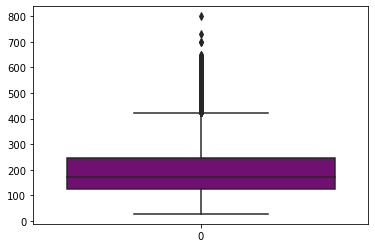

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['horsepower'],color=colors[2])

In [81]:
data['horsepower_group']=pd.qcut(data['horsepower'],5)

Text(0, 0.5, 'horsepower_group')

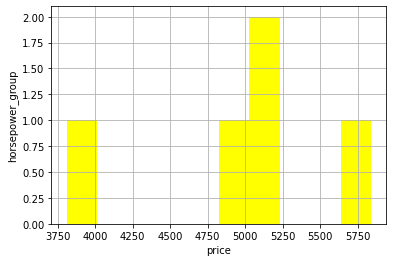

In [82]:
data.groupby(['horsepower_group'])['price'].count().hist(color=colors[3])
plt.xlabel('price')
plt.ylabel('horsepower_group')

In [ ]:
#data['price_group']=pd.qcut(data['price'],10)

### Количество владельцев

In [83]:
data.owners.value_counts()

 1владелец             9802
 3 или более           7415
 2владельца            5820
 Не требует ремонта    1177
 Оригинал               358
 Владельцы               74
 Дубликат                45
 Состояние                9
 ПТС                      1
Name: owners, dtype: int64

In [84]:
data['owners']=data['owners'].apply(lambda x: '3 или более' if '3' in x 
                                       else ('2 владельца' if '2' in x else (
        '1 владелец' if '1' in x else 'no_info')))
data.owners.value_counts()

1 владелец     9802
3 или более    7415
2 владельца    5820
no_info        1664
Name: owners, dtype: int64

### Растаможен или нет


In [85]:
data.customs_clearance.value_counts()

 Растаможен             20123
 Оригинал                1077
 Рассмотрю варианты       139
 Дубликат                 100
 1 месяц                   85
                        ...  
 16 лет и 2 месяца          1
 15 лет и 6 месяцев         1
 14 лет и 12 месяцев        1
 До апреля 2023             1
 LGW**************          1
Name: customs_clearance, Length: 283, dtype: int64

In [86]:
data['customs_clearance']=data['customs_clearance'].apply(lambda x: 'Растаможен' if 'Растаможен' in x 
                                       else 'no_info')

In [87]:
data.isnull().sum()

name                 0
price                0
year                 0
mileage              0
type                 0
color                0
engAndPower          0
engine               0
transmission         0
drive_unit           0
wheel                0
v_condition          0
owners               0
passport             0
customs_clearance    0
28                   0
params2              0
brand                0
price_group          0
year_group           0
mileage_group        0
eng_volume           0
horsepower           0
empty                0
horsepower_group     0
dtype: int64

### Анализ комментария


In [88]:
data['params2'] = data['params2'].apply(str)

In [89]:
data['params2']=data['params2'].apply(lambda x: 'Возможен обмен' if 'обмен' in x 
                                       else ('Идеальное состояние' if 'отличн' in x 
                                             else('Собственник' if 'собственни' in x
                                                   else('Кредит' if 'кредит' in x
                                                        else('Срочный выкуп' if 'выкуп' in x 
 else('C пробегом' if 'с пробегом' in x else('Дилер' if 'дилер' in x else 'no_info'))
                                            )))))

In [90]:
data[data['params2']=='no_info']

,name,price,year,mileage,type,color,engAndPower,engine,transmission,drive_unit,...,28,params2,brand,price_group,year_group,mileage_group,eng_volume,horsepower,empty,horsepower_group
0,BMW 3 серии 320d xDrive VI (F3x) Рестайлинг,1795000,2016,87000,седан,чёрный,2.0 л / 190л.с. /,Дизель,автоматическая,полный,...,Растаможен,no_info,BMW,"(1725000.0, 2225000.0]","(2013.0, 2016.0]","(82653.4, 100492.0]",2.0,190,,"(150.0, 190.0]"
1,Toyota ISis I Рестайлинг,870000,2011,136400,компактвэн,серебристый,1.8 л / 144л.с. /,Бензин,вариатор,передний,...,ZGM100***********,no_info,TOYOTA,"(847000.0, 1099000.0]","(1947.999, 2011.0]","(121799.6, 143319.4]",1.8,144,,"(116.0, 150.0]"
3,Toyota RAV4 IV (CA40),1635000,2013,69900,внедорожник 5 дв.,чёрный,2.0 л / 146л.с. /,Бензин,вариатор,полный,...,Растаможен,no_info,TOYOTA,"(1375977.0, 1725000.0]","(2011.0, 2013.0]","(64000.0, 82653.4]",2.0,146,,"(116.0, 150.0]"
10,Hyundai Accent ТагАЗ II,145000,2005,200000,седан,чёрный,1.5 л / 102л.с. /,Бензин,механическая,передний,...,Рассмотрю варианты,no_info,HYUNDAI,"(19999.999, 450000.0]","(1947.999, 2011.0]","(171025.0, 217592.0]",1.5,102,,"(26.999, 116.0]"
11,Renault Logan I Рестайлинг,110000,2013,300000,седан,белый,1.4 л / 75л.с. /,Бензин,механическая,передний,...,Рассмотрю варианты,no_info,RENAULT,"(19999.999, 450000.0]","(2011.0, 2013.0]","(217592.0, 1000000.0]",1.4,75,,"(26.999, 116.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61256,Volkswagen Polo VI,1071900,2021,90,лифтбек,белый,1.6 л / 110л.с. /,Бензин,механическая,передний,...,XW8**************,no_info,VOLKSWAGEN,"(847000.0, 1099000.0]","(2018.0, 2021.0]","(0.999, 20400.0]",1.6,110,,"(26.999, 116.0]"
61277,Volkswagen Polo IV,230000,2002,180000,хэтчбек 5 дв.,белый,1.4 л / 75л.с. /,Бензин,механическая,передний,...,Растаможен,no_info,VOLKSWAGEN,"(19999.999, 450000.0]","(1947.999, 2011.0]","(171025.0, 217592.0]",1.4,75,,"(26.999, 116.0]"
61283,Volkswagen Touareg II Рестайлинг,3055000,2017,80000,внедорожник 5 дв.,пурпурный,3.6 л / 249л.с. /,Бензин,автоматическая,полный,...,Растаможен,no_info,VOLKSWAGEN,"(2987400.0, 4250163.4]","(2016.0, 2018.0]","(64000.0, 82653.4]",3.6,249,,"(190.0, 249.0]"
61284,Volkswagen Polo V Рестайлинг,660000,2017,64000,седан,серый,1.6 л / 110л.с. /,Бензин,автоматическая,передний,...,Растаможен,no_info,VOLKSWAGEN,"(649000.0, 847000.0]","(2016.0, 2018.0]","(43796.0, 64000.0]",1.6,110,,"(26.999, 116.0]"


In [91]:
data.params2.value_counts()

Возможен обмен         11054
Кредит                  3911
no_info                 3739
Идеальное состояние     2061
C пробегом              1369
Дилер                    984
Собственник              845
Срочный выкуп            738
Name: params2, dtype: int64

In [93]:
data1=data[['brand','price',              'year',
                 'mileage',              'type',             'color',
                     'engine',      'transmission',
              'drive_unit',             'wheel',       'v_condition',
                  'owners',          'passport', 'customs_clearance',
                
              'eng_volume',        'horsepower']]

In [94]:
data.to_csv('AUTO1.csv')

Дальнешее EDA я проведу уже совместно с тестовым датасетом на Kaggle